In [39]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_beats_reviews.csv to cleaned_beats_reviews (1).csv


In [40]:
import pandas as pd

# Load the cleaned dataset
df_reviews = pd.read_csv('/content/cleaned_beats_reviews.csv')

# Verify the data
print(df_reviews.head())

        review_id                                 product_id  \
0  R1TNTONRLTPEWR  JBL Tune 230NC TWS. True wireless earbuds   
1  R11OSJ184YK5L8  JBL Tune 230NC TWS. True wireless earbuds   
2  R2ND8UB3QKR4XD  JBL Tune 230NC TWS. True wireless earbuds   
3  R1ATLW9X08QUD0  JBL Tune 230NC TWS. True wireless earbuds   
4  R1PDE5V244R06D  JBL Tune 230NC TWS. True wireless earbuds   

                                               title            author  \
0  5.0 out of 5 stars Raycons better up their gam...            Dawson   
1           5.0 out of 5 stars Amazing sound quality   Amazon Customer   
2                4.0 out of 5 stars JBL for the win.             Amber   
3  5.0 out of 5 stars Great sound, comfortable in...  Rusty Squeezebox   
4  5.0 out of 5 stars At 50% or more off, these a...            Dru Ha   

   rating                                            content  \
0     5.0  Before I bought these I had raycons. Raycon ea...   
1     5.0  This review is representative o

In [41]:
# Display summary of the dataset
print("\nDataset summary:")
print(df_reviews.info())


Dataset summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review_id           1058 non-null   object 
 1   product_id          1058 non-null   object 
 2   title               1058 non-null   object 
 3   author              1058 non-null   object 
 4   rating              1058 non-null   float64
 5   content             1058 non-null   object 
 6   timestamp           1058 non-null   object 
 7   profile_id          1058 non-null   object 
 8   is_verified         1058 non-null   float64
 9   helpful_count       1058 non-null   float64
 10  product_attributes  1058 non-null   object 
dtypes: float64(3), object(8)
memory usage: 91.0+ KB
None


In [42]:
# Provide descriptive statistics
print("\nDescriptive statistics:")
print(df_reviews.describe(include='all'))


Descriptive statistics:
             review_id                                       product_id  \
count             1058                                             1058   
unique            1058                                               12   
top     R1TNTONRLTPEWR  Skullcandy Smokin' Buds In-Ear Wireless Earbuds   
freq                 1                                              100   
mean               NaN                                              NaN   
std                NaN                                              NaN   
min                NaN                                              NaN   
25%                NaN                                              NaN   
50%                NaN                                              NaN   
75%                NaN                                              NaN   
max                NaN                                              NaN   

                                 title           author       rating conte

In [43]:
# Summary statistics for numerical variables
numerical_summary = df_reviews.describe()
print("Numerical Summary:")
print(numerical_summary)

Numerical Summary:
            rating  is_verified  helpful_count
count  1058.000000       1058.0    1058.000000
mean      4.329868          1.0       3.414934
std       0.984206          0.0      15.760232
min       1.000000          1.0       0.000000
25%       4.000000          1.0       0.000000
50%       5.000000          1.0       0.000000
75%       5.000000          1.0       1.000000
max       5.000000          1.0     283.000000


In [44]:
# Verify that missing values are handled
print("\nMissing values after handling:")
print(df_reviews.isnull().sum())


Missing values after handling:
review_id             0
product_id            0
title                 0
author                0
rating                0
content               0
timestamp             0
profile_id            0
is_verified           0
helpful_count         0
product_attributes    0
dtype: int64


In [45]:
# Verify that duplicates are removed
duplicates_after = df_reviews.duplicated().sum()
print(f"\nNumber of duplicate rows after removal: {duplicates_after}")


Number of duplicate rows after removal: 0


**2. Frequency Distribution of Categorical Variables:**

In [46]:
categorical_columns = ['product_id', 'author', 'product_attributes']
for column in categorical_columns:
    frequency = df_reviews[column].value_counts()
    print(f"Frequency distribution for {column}:")
    print(frequency)
    print("\n")

Frequency distribution for product_id:
product_id
Skullcandy Smokin' Buds In-Ear Wireless Earbuds                                  100
Bang & Olufsen Beosound Explore - Wireless Portable Outdoor Bluetooth speaker    100
Google Pixel Buds A-Series - Wireless Earbuds                                    100
Sennheiser Consumer Audio CX True Wireless Earbuds                                99
Sony WF-C700N Truly Wireless Noise Canceling in-Ear Bluetooth Earbud              99
JBL Tune 230NC TWS. True wireless earbuds                                         98
House of Marley - Get Together Bluetooth Portable Bluetooth Speaker               97
Beats Studio Buds - True Wireless Noise Canceling Earbuds                         95
JBL CHARGE 5 - Portable (IP67) Bluetooth Speaker                                  91
Marshall Emberton II Portable Bluetooth Speaker                                   88
Sony SRS XE200 Portable Bluetooth Speaker                                         69
Beats Pill - Bl

# Feature Engineering

**Adding a new column that contains the total number of words in the content column**

In [47]:
# Function to count the number of words in a text
def count_words(text):
    return len(text.split())

# Apply the function to the content column and create a new column
df_reviews['word_count'] = df_reviews['content'].apply(count_words)

# Preview the dataset with the new word_count column
print(df_reviews[['content', 'word_count']].head())

                                             content  word_count
0  Before I bought these I had raycons. Raycon ea...         318
1  This review is representative of my first impr...         389
2  Affordable, and great all arounder. Noise canc...         128
3  Took a chance and bought these on prime day, p...         127
4  I have one pair for work and one for home/goin...         462


In [48]:
# Check the first few rows to ensure the word count is correct
print(df_reviews[['content', 'word_count']].head())

# Get some descriptive statistics about the word counts
print("\nDescriptive statistics of word counts:")
print(df_reviews['word_count'].describe())

                                             content  word_count
0  Before I bought these I had raycons. Raycon ea...         318
1  This review is representative of my first impr...         389
2  Affordable, and great all arounder. Noise canc...         128
3  Took a chance and bought these on prime day, p...         127
4  I have one pair for work and one for home/goin...         462

Descriptive statistics of word counts:
count    1058.000000
mean       79.161626
std       111.112715
min         1.000000
25%        15.000000
50%        38.000000
75%        96.000000
max      1459.000000
Name: word_count, dtype: float64


In [79]:
# First, create a new column to categorize products into 'Earbuds' and 'Speakers'
df_reviews['product_category'] = df_reviews['product_id'].map({
    'Skullcandy Smokin\' Buds In-Ear Wireless Earbuds': 'Earbuds',
    'Bang & Olufsen Beosound Explore - Wireless Portable Outdoor Bluetooth speaker': 'Speakers',
    'Google Pixel Buds A-Series - Wireless Earbuds': 'Earbuds',
    'Sennheiser Consumer Audio CX True Wireless Earbuds': 'Earbuds',
    'Sony WF-C700N Truly Wireless Noise Canceling in-Ear Bluetooth Earbud': 'Earbuds',
    'JBL Tune 230NC TWS. True wireless earbuds': 'Earbuds',
    'House of Marley - Get Together Bluetooth Portable Bluetooth Speaker': 'Speakers',
    'Beats Studio Buds - True Wireless Noise Canceling Earbuds': 'Earbuds',
    'JBL CHARGE 5 - Portable (IP67) Bluetooth Speaker': 'Speakers',
    'Marshall Emberton II Portable Bluetooth Speaker': 'Speakers',
    'Sony SRS XE200 Portable Bluetooth Speaker': 'Speakers',
    'Beats Pill - Bluetooth Speaker': 'Speakers'
})


# Data Visualization

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visual style
sns.set(style="whitegrid")

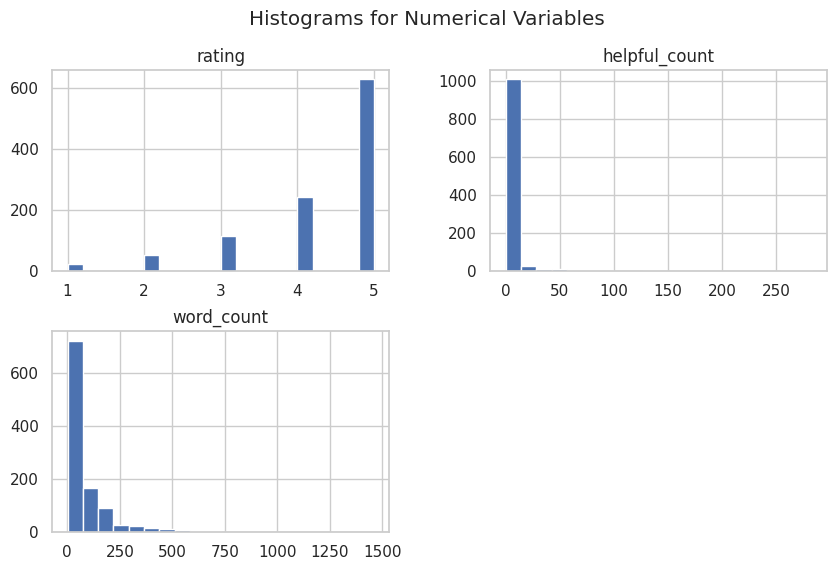

In [72]:
# Histograms for numerical variables
df_reviews[['rating', 'helpful_count','word_count']].hist(bins=20, figsize=(10, 6))
plt.suptitle('Histograms for Numerical Variables')
plt.show()

**Visualizing the distribution of ratings using a count plot.**

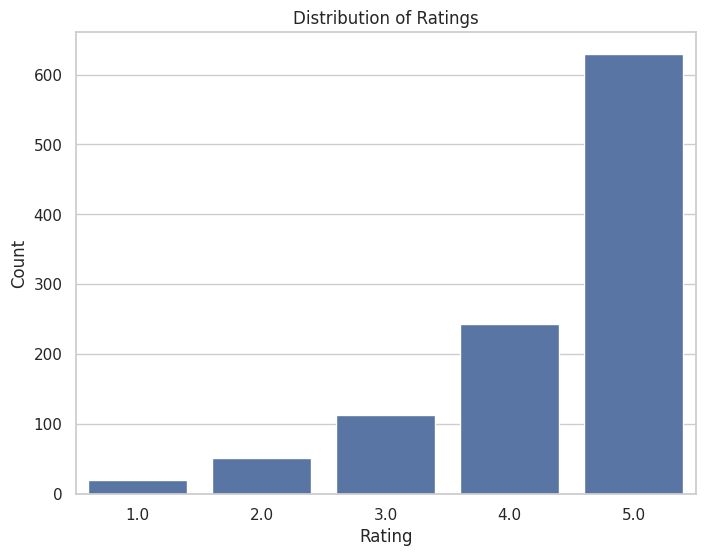

In [73]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df_reviews)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

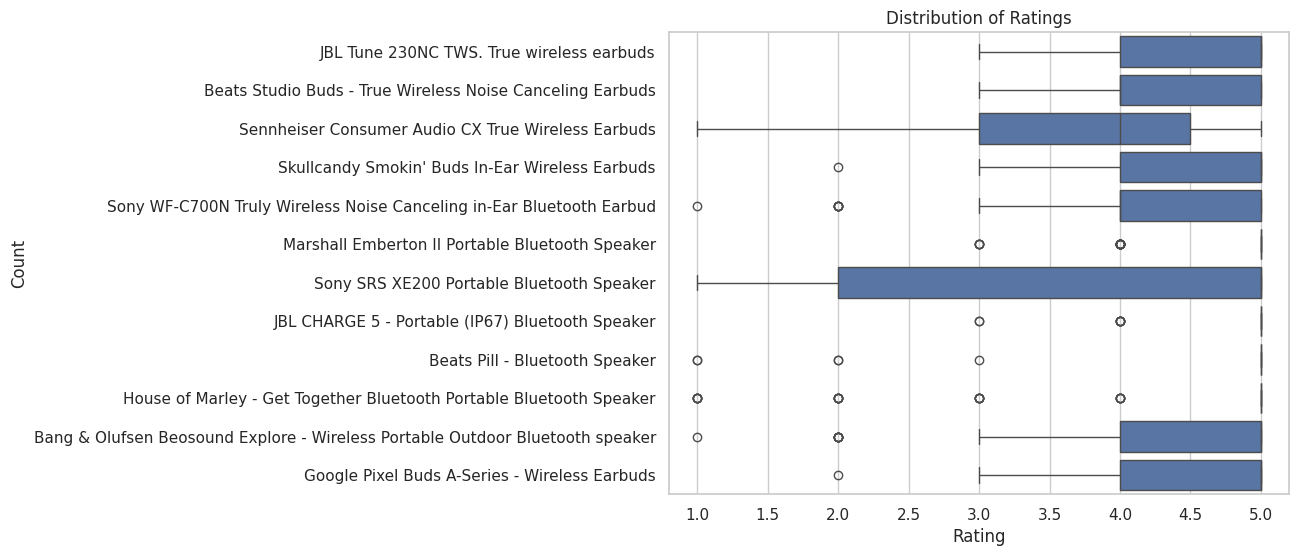

In [52]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='rating', y='product_id', data=df_reviews)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

**CORRELATION ANALYSIS**

In [74]:
# Calculate the correlation matrix only for numerical columns
correlation_matrix = df_reviews[['rating', 'helpful_count','word_count']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Covariance Analysis
covariance_matrix = df_reviews[['rating', 'helpful_count','word_count']].cov()
print("Covariance Matrix:")
print(covariance_matrix)

Correlation Matrix:
                 rating  helpful_count  word_count
rating         1.000000      -0.027191   -0.208462
helpful_count -0.027191       1.000000    0.661112
word_count    -0.208462       0.661112    1.000000
Covariance Matrix:
                  rating  helpful_count    word_count
rating          0.968662      -0.421771    -22.796980
helpful_count  -0.421771     248.384904   1157.714330
word_count    -22.796980    1157.714330  12346.035347


Correlation Matrix:

The correlation between rating and helpful_count is -0.027191, indicating a very weak negative linear relationship. This suggests that there is almost no linear relationship between how a review is rated and how helpful it is perceived to be.

The correlation between helpful_count and word_count is approximately 0.661. This indicates a moderate to strong positive correlation, suggesting that longer reviews are more likely to be marked as helpful.

Covariance Matrix:

The covariance between rating and helpful_count is -0.421771. This negative covariance suggests that as the rating increases, the helpful count tends to slightly decrease, though the relationship is weak.

The variance for rating is 0.968662, and for helpful_count, it is 248.384904. The larger variance in helpful_count indicates that it has a much wider spread compared to rating.

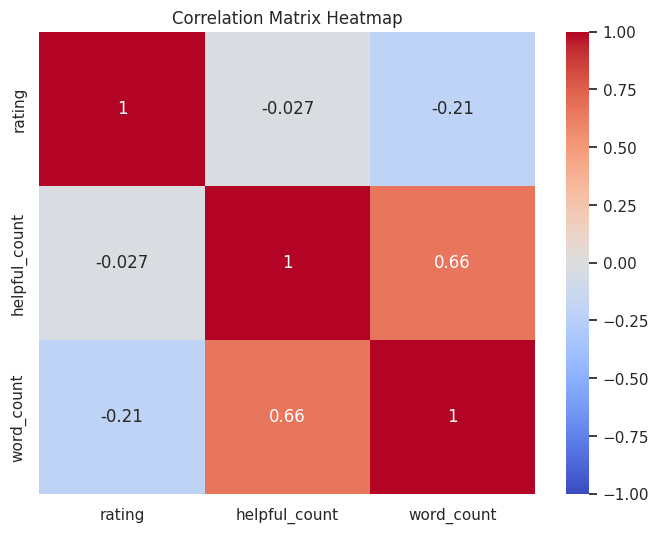

In [75]:
# Correlation matrix
correlation_matrix = df_reviews[['rating', 'helpful_count','word_count']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

**Product-wise Analysis:**

In [76]:
# Group by product and calculate mean rating and helpful_count
product_analysis = df_reviews.groupby('product_id').agg({
    'rating': 'mean',
    'helpful_count': 'mean',
    'is_verified': 'mean',
    'word_count': 'mean'
}).reset_index()

print("Product-wise Analysis:")
print(product_analysis)

Product-wise Analysis:
                                           product_id    rating  \
0   Bang & Olufsen Beosound Explore - Wireless Por...  4.330000   
1                      Beats Pill - Bluetooth Speaker  4.272727   
2   Beats Studio Buds - True Wireless Noise Cancel...  4.378947   
3       Google Pixel Buds A-Series - Wireless Earbuds  4.370000   
4   House of Marley - Get Together Bluetooth Porta...  4.453608   
5    JBL CHARGE 5 - Portable (IP67) Bluetooth Speaker  4.890110   
6           JBL Tune 230NC TWS. True wireless earbuds  4.551020   
7     Marshall Emberton II Portable Bluetooth Speaker  4.715909   
8   Sennheiser Consumer Audio CX True Wireless Ear...  3.555556   
9     Skullcandy Smokin' Buds In-Ear Wireless Earbuds  4.430000   
10          Sony SRS XE200 Portable Bluetooth Speaker  3.681159   
11  Sony WF-C700N Truly Wireless Noise Canceling i...  4.181818   

    helpful_count  is_verified  word_count  
0        4.450000          1.0   68.460000  
1        0.7727

**Bar Plot for Product-wise Ratings:**

<ipython-input-56-22299536536c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='product_id', data=product_analysis, palette='viridis')


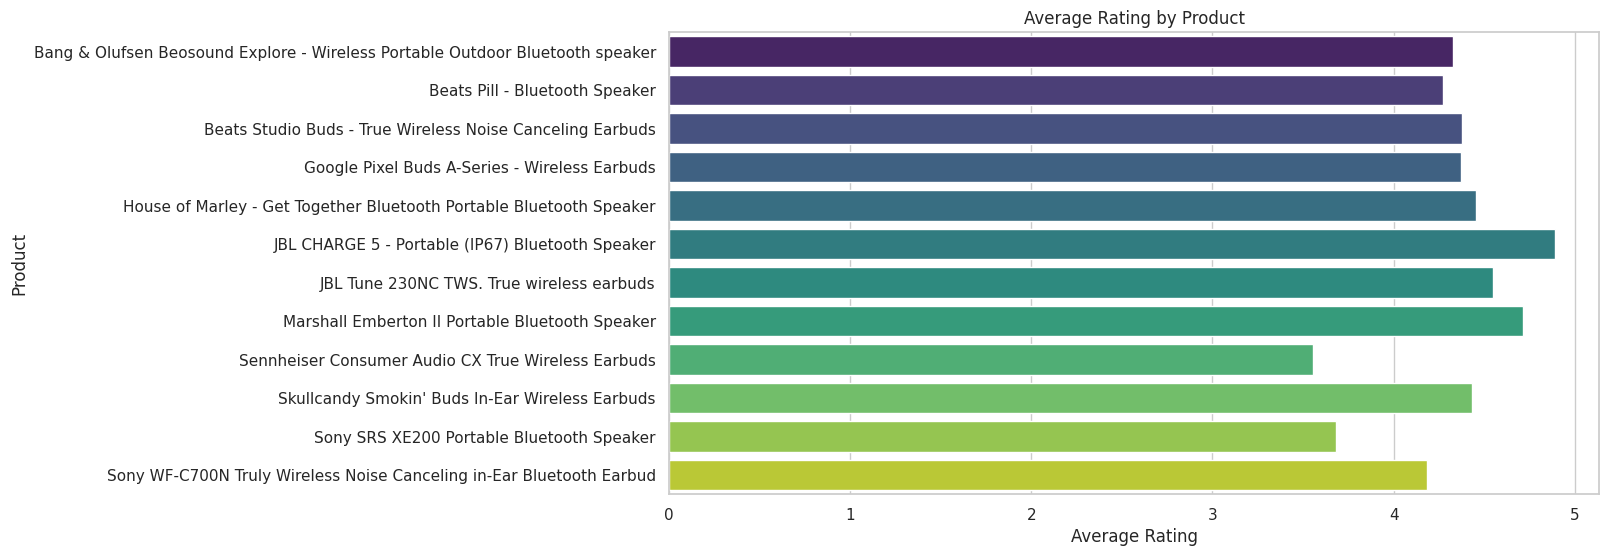

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for average rating by product
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='product_id', data=product_analysis, palette='viridis')
plt.title('Average Rating by Product')
plt.xlabel('Average Rating')
plt.ylabel('Product')
plt.show()

# Sentiment Analysis

In [57]:
from textblob import TextBlob

# Function to get the sentiment score
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the function to the content column
df_reviews['sentiment'] = df_reviews['content'].apply(get_sentiment)

# Classify the sentiment as positive, negative, or neutral
df_reviews['sentiment_category'] = df_reviews['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

**Sentiment Distribution**

In [58]:
from textblob import TextBlob

# Function to get the sentiment score
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the sentiment analysis to the content of each review
df_reviews['sentiment_score'] = df_reviews['content'].apply(get_sentiment)

# Preview the dataset with the new sentiment_score column
print(df_reviews[['content', 'sentiment_score']].head())

# Define sentiment categories based on the sentiment score
df_reviews['sentiment_category'] = df_reviews['sentiment_score'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

# Preview the sentiment categories
print(df_reviews[['content', 'sentiment_score', 'sentiment_category']].head())

# Calculate the overall average sentiment score
overall_sentiment_score = df_reviews['sentiment_score'].mean()
print(f"Overall Average Sentiment Score: {overall_sentiment_score}")

# Count the number of reviews in each sentiment category
sentiment_distribution = df_reviews['sentiment_category'].value_counts()
print("\nSentiment Category Distribution:")
print(sentiment_distribution)

                                             content  sentiment_score
0  Before I bought these I had raycons. Raycon ea...         0.397921
1  This review is representative of my first impr...         0.245455
2  Affordable, and great all arounder. Noise canc...         0.313141
3  Took a chance and bought these on prime day, p...         0.226562
4  I have one pair for work and one for home/goin...         0.175028
                                             content  sentiment_score  \
0  Before I bought these I had raycons. Raycon ea...         0.397921   
1  This review is representative of my first impr...         0.245455   
2  Affordable, and great all arounder. Noise canc...         0.313141   
3  Took a chance and bought these on prime day, p...         0.226562   
4  I have one pair for work and one for home/goin...         0.175028   

  sentiment_category  
0           Positive  
1           Positive  
2           Positive  
3           Positive  
4           Positive  
Ove

<ipython-input-59-06d0bf710930>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=df_reviews, palette='viridis')


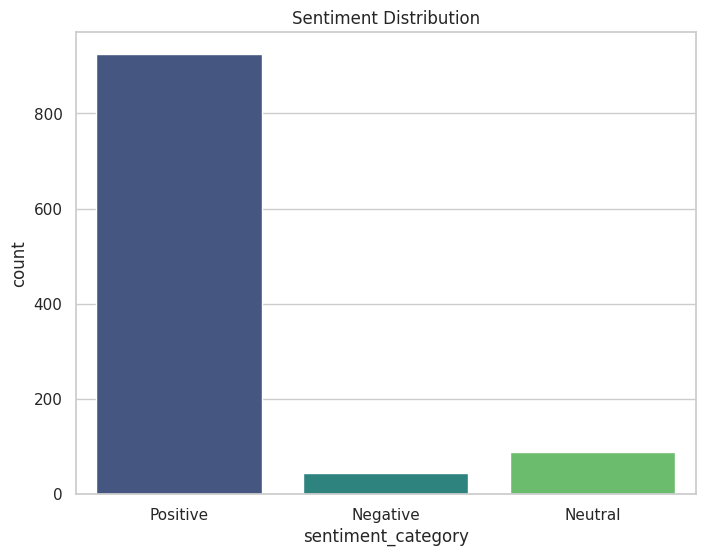

In [59]:
# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_category', data=df_reviews, palette='viridis')
plt.title('Sentiment Distribution')
plt.show()

<ipython-input-60-0b668daf1df5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment_category', y='rating', data=sentiment_analysis, palette='coolwarm')


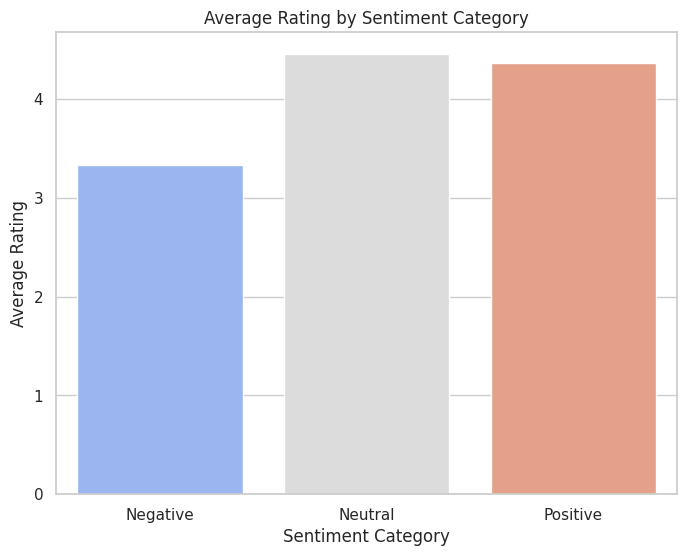

In [60]:
# Bar plot for average rating by sentiment category
plt.figure(figsize=(8, 6))
sns.barplot(x='sentiment_category', y='rating', data=sentiment_analysis, palette='coolwarm')
plt.title('Average Rating by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Average Rating')
plt.show()

**Sentiment Analysis by Category**

In [80]:
# Now, let's calculate sentiment distribution for each category
earbuds_sentiment = df_reviews[df_reviews['product_category'] == 'Earbuds']['sentiment_category'].value_counts()
speakers_sentiment = df_reviews[df_reviews['product_category'] == 'Speakers']['sentiment_category'].value_counts()

print("Earbuds Sentiment Distribution:")
print(earbuds_sentiment)
print("\nSpeakers Sentiment Distribution:")
print(speakers_sentiment)

Earbuds Sentiment Distribution:
sentiment_category
Positive    531
Neutral      34
Negative     26
Name: count, dtype: int64

Speakers Sentiment Distribution:
sentiment_category
Positive    394
Neutral      54
Negative     19
Name: count, dtype: int64


In [81]:
df_reviews.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,word_count,sentiment,sentiment_category,sentiment_score,product_category
0,R1TNTONRLTPEWR,JBL Tune 230NC TWS. True wireless earbuds,5.0 out of 5 stars Raycons better up their gam...,Dawson,5.0,Before I bought these I had raycons. Raycon ea...,"Reviewed in the United States May 16, 2024",AGI3WTFII3HB6JI2GL5PM7J7F7DQ,1.0,54.0,Color: BlackStyle: Headphones,318,0.397921,Positive,0.397921,Earbuds
1,R11OSJ184YK5L8,JBL Tune 230NC TWS. True wireless earbuds,5.0 out of 5 stars Amazing sound quality,Amazon Customer,5.0,This review is representative of my first impr...,"Reviewed in the United States July 19, 2024",AHDFGIHZLAWNS6GVEJFT6HO4JONQ,1.0,18.0,Color: BlackStyle: Headphones,389,0.245455,Positive,0.245455,Earbuds
2,R2ND8UB3QKR4XD,JBL Tune 230NC TWS. True wireless earbuds,4.0 out of 5 stars JBL for the win.,Amber,4.0,"Affordable, and great all arounder. Noise canc...","Reviewed in the United States July 29, 2024",AHKSTPYCQ256XNBIJJNN5IKNF43A,1.0,1.0,Color: BlueStyle: Headphones,128,0.313141,Positive,0.313141,Earbuds
3,R1ATLW9X08QUD0,JBL Tune 230NC TWS. True wireless earbuds,"5.0 out of 5 stars Great sound, comfortable in...",Rusty Squeezebox,5.0,"Took a chance and bought these on prime day, p...","Reviewed in the United States July 25, 2024",AGYXE4BIFF7ICA2CNQ27K5VYPBCQ,1.0,0.0,Color: BlackStyle: Headphones,127,0.226562,Positive,0.226562,Earbuds
4,R1PDE5V244R06D,JBL Tune 230NC TWS. True wireless earbuds,"5.0 out of 5 stars At 50% or more off, these a...",Dru Ha,5.0,I have one pair for work and one for home/goin...,"Reviewed in the United States November 11, 2023",AFUR62MXQUALQJX5LDFW3KOQBQLA,1.0,99.0,Color: BlueStyle: Headphones,462,0.175028,Positive,0.175028,Earbuds


In [82]:
# Separating Beats products for sentiment comparison
beats_earbuds = df_reviews[(df_reviews['product_id'] == 'Beats Studio Buds - True Wireless Noise Canceling Earbuds') & (df_reviews['product_category'] == 'Earbuds')]
beats_speakers = df_reviews[(df_reviews['product_id'] == 'Beats Pill - Bluetooth Speaker') & (df_reviews['product_category'] == 'Speakers')]

# Calculate sentiment distribution for Beats products
beats_earbuds_sentiment = beats_earbuds['sentiment_category'].value_counts()
beats_speakers_sentiment = beats_speakers['sentiment_category'].value_counts()

# Compare with other brands in the same category
other_earbuds = df_reviews[(df_reviews['product_id'] != 'Beats Studio Buds - True Wireless Noise Canceling Earbuds') & (df_reviews['product_category'] == 'Earbuds')]
other_speakers = df_reviews[(df_reviews['product_id'] != 'Beats Pill - Bluetooth Speaker') & (df_reviews['product_category'] == 'Speakers')]

other_earbuds_sentiment = other_earbuds['sentiment_category'].value_counts()
other_speakers_sentiment = other_speakers['sentiment_category'].value_counts()

print("\nBeats Earbuds Sentiment Distribution:")
print(beats_earbuds_sentiment)
print("\nOther Earbuds Sentiment Distribution:")
print(other_earbuds_sentiment)

print("\nBeats Speakers Sentiment Distribution:")
print(beats_speakers_sentiment)
print("\nOther Speakers Sentiment Distribution:")
print(other_speakers_sentiment)


Beats Earbuds Sentiment Distribution:
sentiment_category
Positive    87
Negative     5
Neutral      3
Name: count, dtype: int64

Other Earbuds Sentiment Distribution:
sentiment_category
Positive    444
Neutral      31
Negative     21
Name: count, dtype: int64

Beats Speakers Sentiment Distribution:
sentiment_category
Positive    20
Neutral      1
Negative     1
Name: count, dtype: int64

Other Speakers Sentiment Distribution:
sentiment_category
Positive    374
Neutral      53
Negative     18
Name: count, dtype: int64


**Rating Distribution Comparison**

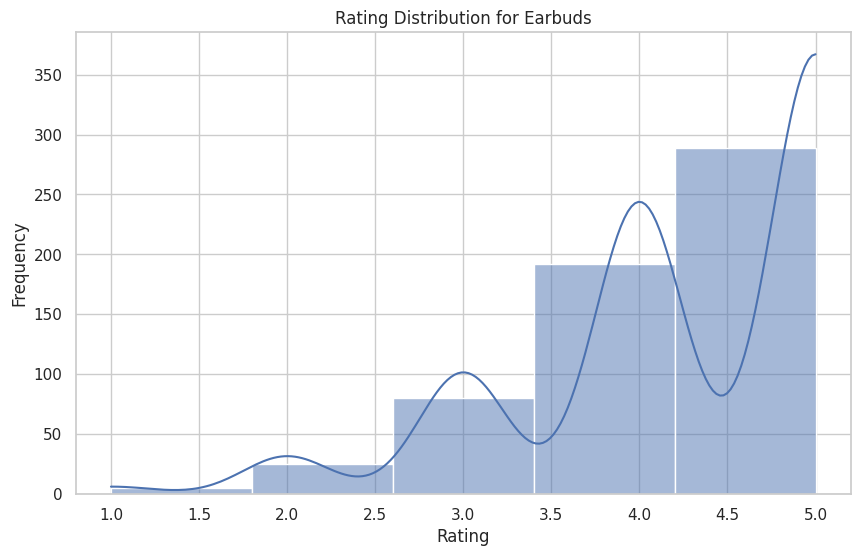

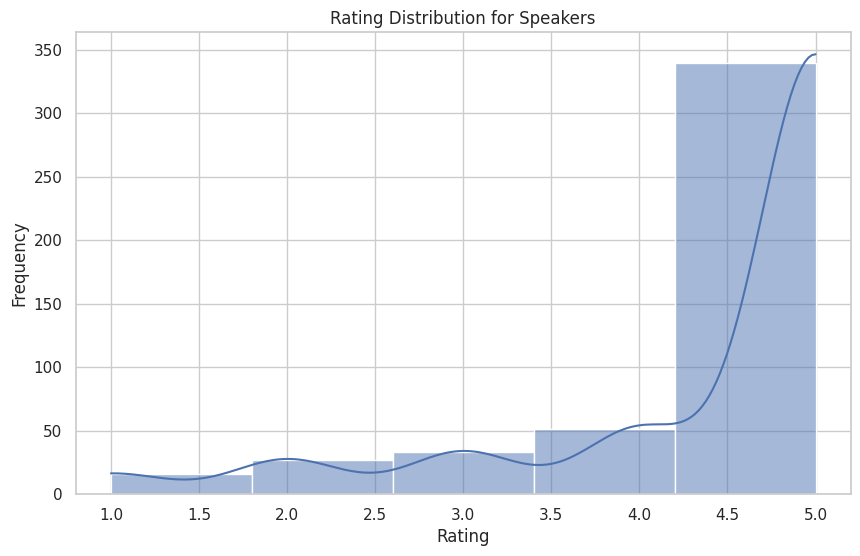

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot rating distribution for Earbuds
plt.figure(figsize=(10, 6))
sns.histplot(df_reviews[df_reviews['product_category'] == 'Earbuds']['rating'], kde=True, bins=5)
plt.title('Rating Distribution for Earbuds')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Plot rating distribution for Speakers
plt.figure(figsize=(10, 6))
sns.histplot(df_reviews[df_reviews['product_category'] == 'Speakers']['rating'], kde=True, bins=5)
plt.title('Rating Distribution for Speakers')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

**Product-Specific Analysis for Beats Products**

In [84]:
# Analyze neutral and negative sentiments for Beats Studio Buds
beats_earbuds_neutral_negative = beats_earbuds[beats_earbuds['sentiment_category'].isin(['Neutral', 'Negative'])]
print("Beats Studio Buds - Neutral and Negative Reviews:")
print(beats_earbuds_neutral_negative[['rating', 'content']].head())

# Analyze neutral and negative sentiments for Beats Pill
beats_speakers_neutral_negative = beats_speakers[beats_speakers['sentiment_category'].isin(['Neutral', 'Negative'])]
print("\nBeats Pill - Neutral and Negative Reviews:")
print(beats_speakers_neutral_negative[['rating', 'content']].head())

Beats Studio Buds - Neutral and Negative Reviews:
     rating                                            content
129     4.0  I did not like that they are very small, and y...
137     4.0  When I got them out of the box on the first pa...
142     4.0  One of the buds did not work but my son wanted...
146     4.0  Sound quality is good. But there are a few lim...
148     4.0         i dont like the charging cable is so short

Beats Pill - Neutral and Negative Reviews:
     rating                                            content
751     5.0                                          Excelente
760     1.0  Randomly turns on and off after 30 to 40 minut...


**Creating a word cloud to visualize common words in the review text.**

In [61]:
# Word cloud of review text
from wordcloud import WordCloud

In [62]:
# Combine all review text into a single string
all_reviews = ' '.join(df_reviews['content'].dropna())

In [63]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

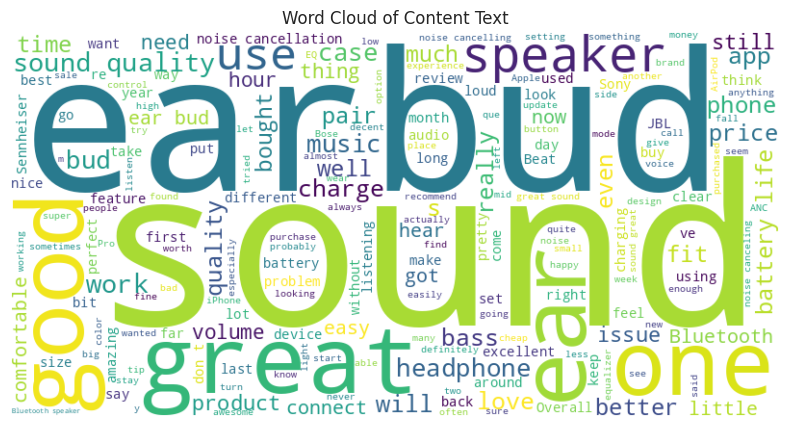

In [64]:
# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Content Text')
plt.show()

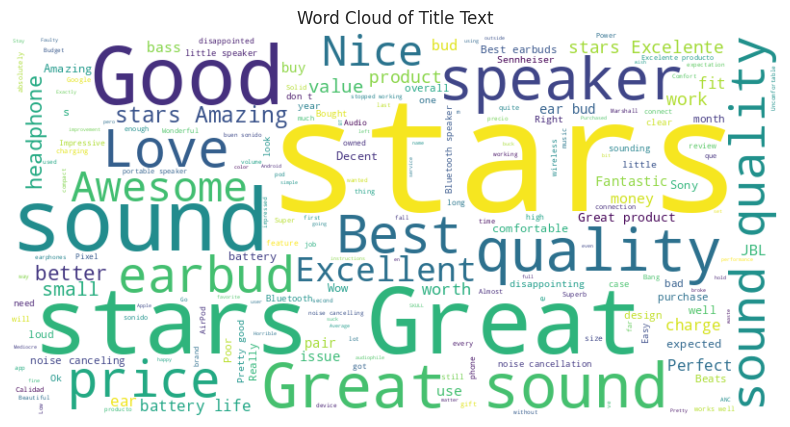

In [65]:
all_titles = ' '.join(df_reviews['title'].dropna())
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)
# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Title Text')
plt.show()

**Weighted Word Clouds for Product attributes**

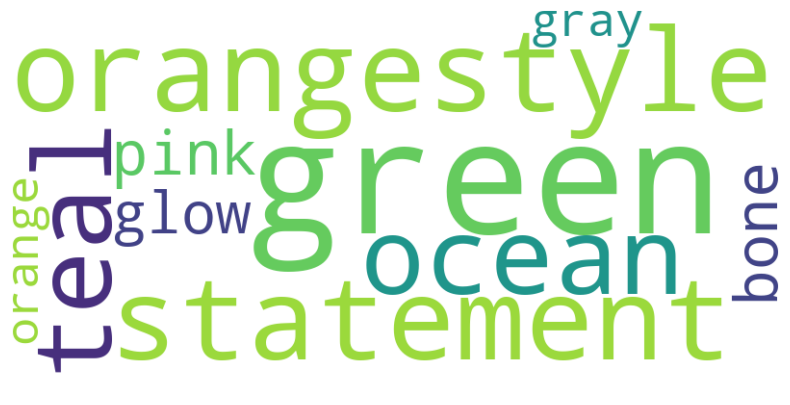

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = list(df_reviews['product_attributes'])

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(corpus)
tfidf_scores = dict(zip(tfidf.get_feature_names_out(), tfidf.idf_))

wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='viridis', max_words=10, prefer_horizontal=0.7)
wordcloud.generate_from_frequencies(tfidf_scores)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [78]:
# Save the New columns DataFrame to a CSV file
df_reviews.to_csv('/content/modified_beats_reviews.csv', index=False)

# Conclusion

**Sentiment Analysis by Product Category:**

Earbuds Sentiment Distribution:

    Beats Studio Buds have a higher proportion of positive reviews compared to other earbuds, but there are still some recurring issues mentioned in the neutral and negative reviews.

Speakers Sentiment Distribution:

    Beats Pill has a predominantly positive sentiment, but the few negative reviews highlight potential product defects or limitations, such as the device turning off unexpectedly.

**Product-Specific Analysis:**

Beats Studio Buds:

    The neutral and negative reviews point to specific issues such as small size, initial product defects, and limitations in sound quality. These concerns should be addressed in future product iterations or through customer support to improve overall satisfaction.

Beats Pill:

    The major issue identified is the device turning off randomly, which could be a critical defect. This should be investigated further by the product team.